# Image Classification on the Alien/Predator Dataset

In the notebook, I have performed image classification on the Alien/Predator Dataset. I have used the famous alien/predator data set from kaggle, which can be found here [Kaggle Alien/Predator Dataset](https://www.kaggle.com/datasets/pmigdal/alien-vs-predator-images). This dataset has two sets of folders, alien and predator. Each of the folders have two more folders train and val. I have loaded the data set in this Notebook, built a model, trained it, plotted the training progression and predicted using the validation dataset, if the image is that of an alien or predator. 

I have divided the notebook, in the following sections:

    *Loading the libraries
    *Loading the Data
    *Normalizing the Data
    *Building the Model
    *Training the Model
    *Plotting the Training results
    *Making Predictions
    
I have explained the working and explanation of the code in each of the sections. 

## Section 1: Loading Libraries

In the below section, I am loading all the encessary liabraries require. I am building a model through Keras, so I am importing all the necessary packages from Keras. Keras is a deep learning API written in Python, running on top of the machine learning platform TensorFlow. The necessary information can be accessed here [Keras.io](https://keras.io/about/). 

In [39]:
#Importing the necessary libraries.

#Importing tensorflow
import tensorflow as tf
#Importing the datetime, required for tensorboard
import datetime
import cv2
#Importing cv2 and os to read the files from the disk
import os
#Importing numpy and pandas
import numpy as np
import pandas as pd

#Importing the packages from keras
import keras
#Importing the models
from keras.models import Sequential, Model
#Imporing the layers from keras
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
#Importing the ImageDataGenerator to normalize the image
from keras.preprocessing.image import ImageDataGenerator
#Importing optmizer Adam and BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from keras.regularizers import l2

#Importing the metrics package from sklearn
from sklearn.metrics import classification_report,confusion_matrix
#Importing the visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [5]:
#Setting up the tensorboard log location and using it in callbacks
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

## Section 2: Loading Data 

In the below sections, I am setting the paths for the train and validation data. I will be passing that path to the get_data function defined to load the data. The data has been divided into two folders, one containing images of alien and the other containing images of predator. I am initially loading the data in the variables Train_Data and Val_Data. I will then be adding the lables of each of them in both the variables. 

I will be loading the images having sizes of 224. This would mean that the images being loaded will have the shape of 224 * 224 * 3. This means that the length and breadth of the image file is 224 * 224. The images being loaded will be coloured, so it will have 3 channels (RGB).

In [68]:
#I am instantiating the variables that will hold the directory values of the rain and val data. 

#Setting the train and val paths:
train_path = r"C:\Users\mit_b\Project Folder\Alien_Predator_Image_Classification\data\train"
val_path = r"C:\Users\mit_b\Project Folder\Alien_Predator_Image_Classification\data\validation"
#Setting the labels being used:
labels = ["alien","predator"]

In [7]:
#I am defining the function, to load the image from the specified directory:

#I am setting the size of the image to be loaded as:
img_size = 224

#Defining the function to load the images from the folder.
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #Converting the format from BGR to RGB
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) #I am reshaping the size of the image at this step
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [8]:
#Loading the data from the directory:
#The variables, Train_Data, Val_Data will hold the loaded image data for train and val respectively. 

Train_Data = get_data(train_path)
Val_Data = get_data(val_path)

<ipython-input-7-831096c9594e>:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


C:\Users\mit_b\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Proportion of lables in the Training Data Set')]

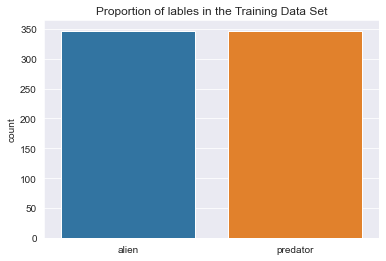

In [9]:
#Tagging the data by the specific labels. 
#Tagging the train dataset and plotting the proportions. 

l = []
for i in Train_Data:
    if(i[1] == 0):
        l.append("alien")
    else:
        l.append("predator")

#Plotting the distribution of the images having the alien and predator labels in the training set. 
sns.set_style('darkgrid')
sns.countplot(l).set(title='Proportion of lables in the Training Data Set')

C:\Users\mit_b\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Proportion of lables in the Validation Data Set')]

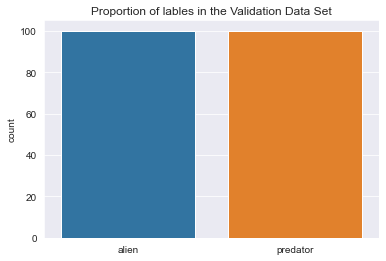

In [10]:
#Tagging the data by the specific labels. 
#Tagging the val dataset and plotting the proportions. 

l = []
for i in Val_Data:
    if(i[1] == 0):
        l.append("alien")
    else:
        l.append("predator")

#Plotting the distribution of the images having the alien and predator labels in the validation set.         
sns.set_style('darkgrid')
sns.countplot(l).set(title='Proportion of lables in the Validation Data Set')

## Plot

In the below section I am plotting the images to understand if they have been loaded properly or not. 

Text(0.5, 1.0, 'predator')

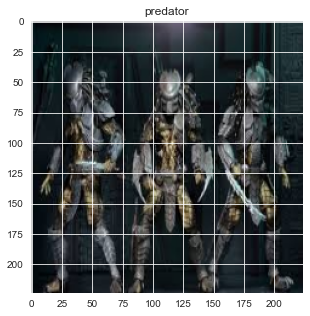

In [69]:
#Plotting the image:
#I am plotting the image to check if the files have been loaded properly. 

plt.figure(figsize = (5,5))
plt.imshow(Train_Data[-1][0])
plt.title(labels[Train_Data[-1][1]])

## Section 3: Normalizing the Data

In the below ection of the code, I am normalizing the image data that has been loaded. I am dividing the images loaded by 255 and then converting them to a numpy array. While developing and training our neural network we ususally multiply the weights and the add the biases to the initial inputs. We than add the activations and backpropagate with the gradients. Ideally we would like the entire process to have a similar range of gradients (if not then the learning process might possibly get out of control). Moreover if the inputs do not have small weight values it can slow down the learning process. 

So it is vital to normalize the pixel values so that each pixel value ranges between 0 and 1. This is acheived by dividing all the pixel values by the largest pixel value, 255, across all channels. It is then converted into a numpy array using the numpy package. 


In [12]:
#Normalizing and Reshaping the Train data:

x_train = []
y_train = []

for feature, label in Train_Data:
  x_train.append(feature)
  y_train.append(label)

#Normalizing and reshaping the data
x_train = np.array(x_train) / 255
x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

In [13]:
#Normalizing and Reshaping the Val data:

x_val = []
y_val = []

for feature, label in Val_Data:
  x_val.append(feature)
  y_val.append(label)

#Normalizing and reshaping the data
x_val = np.array(x_val) / 255
x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

### Data Augmentation

In the section of code below, I'm augmenting the data. There is a good chance that if we train your model on a large number of images, the model will produce a favorable and accurate result. However, there are times when we do not have enough data to train a model (as in this case). As a result, Data Augmentation is a technique for increasing data size for model training without adding new data. Data augmentation is a method of creating new training data from existing training data. This is accomplished by employing domain-specific techniques on training data examples, yielding new and distinct training examples. The goal is to add new, plausible examples to the training dataset.

Thus, the goal is to supplement the training dataset with new, plausible examples. This refers to image variations from the training set that the model is likely to encounter. A horizontal flip of an alien photograph, for example, may make sense because the photograph could have been taken from the left or right. A vertical flip of an alien photo makes no sense and is most likely inappropriate, given that the model is very unlikely to see an upside down alien photo. As a result, I did a horizontal flip of the image but not a vertical flip.

In [14]:
#In the below code section, I am doing Data Augmentation, on the training data. 

datagen = ImageDataGenerator(
        featurewise_center=False, #Setting the mean value to 0, over the dataset. 
        samplewise_center=False,  #Setting the sample mean to 0
        featurewise_std_normalization=False,
        samplewise_std_normalization=False, 
        zca_whitening=False,  #I am applying ZCA whitening on the images
        rotation_range = 30,  #Rotating the image
        zoom_range = 0.2, #Zooming on the image 
        width_shift_range=0.1,  #Horizontally shifting the images. 
        height_shift_range=0.1,  #Vertically shifting the images.
        horizontal_flip = True,  #Horizontally flipping the image. 
        vertical_flip=False)  #I am setting the vertical flip of the image to FALSE, as it is unlikely. 


#Fitting the training data in the ImageDataGenerator
datagen.fit(x_train)

## Section 4: Developing the Model

### Convolution Layer

Neural Networks can either be fully connected or locally connected (partially). While creating Neural Networks for images, it is useful to only focus on some aspects of the image (local perspective) rather than considering the entire image. This can be implemenetd in a Convolution layer. We can implement concepts like Sparse connectivity here, by connecting only some layers and not having fully connected layers. This can also help us reduce the number of weights, computational cost and can also reduce the risk of overfitting. 

The Convolution layer can be implemented in Keras using Conv2D. In this we have the precission of specifying the weights, activation and padding. We have to import the Conv2D layer by adding the layer to the model. In order to add these layers we will have to import the layers from keras. This can be done by running the following line:

from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout


### Optimizer

Optmizers might be considered to be the algorithms or methods which will be used to adpat the weights and learning in order to reduce the loss over epochs. Optmizers thus keep updating the weights after each epoch. There are quite a few optimizers that are avilable, like RMSProp, Gradient Descent, Stochastic Gradient Descent, Adam, etc. I have used the Adam in this case to build the model. To understand Adam we must first understand the concept of momentum and RMSProp. 

Momentum:
In this case each parameter changes at a rate approxite to itself. This means that there is no fixed learning rate for every parameter. 

RMSProp:
In this case while updating the parameters we will divide the 'gradient' by the 'square root of average squared gradient'. 

Adam:
In this case both the velocity and acceleration terms are considered. 
Adam initializes all the terms to 0, then performs the bias correction, in order to calculate the moving average. 

### Softmax

The output layer of the model has the softmax activation function. This is vital as this is a classification problem. In a classification problem the idea is to  classify the images between 0/1 (either alien or predator). The softmax activation function is necessary as it outputs either 0/1.


In [27]:
#Defining the model at this step:
#I am defining the Standard CNN model at this step, I have named it model. 

#Defining the model:
model = Sequential()

#Input layer of the model, taking the input images of specified shape
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding="valid"))

#Layer 1 of the model, having weight of 32 and kernel size of 3. 
#This layer uses the "relu" activation. 
model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

#Layer 2 of the model, having weight of 64 and kernel size of 3. 
#This layer uses the "relu" activation. 
model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding="valid"))
model.add(Dropout(0.4))

#Layer 3, fully connected layer of the model
model.add(Flatten())
model.add(Dense(128,activation="relu"))
tf.keras.layers.BatchNormalization
model.add(BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True))

#Output layer of the model
model.add(Dense(2, activation="softmax"))

#Printing the summary of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 28, 28, 64)      

## Section 5: Training the Model

### Model Run 1

In this run of the model, I have kept the following hyperparameters:
learning rate = 0.1; Optmizer = Stochastic Gradient Descent; loss = Sparse Categorical Cross Entropy; epochs = 50, batch size = 32

In [37]:
#Setting the optmizer as stochastic gradient descent, with a learning rate of 0.1. 
opt = tf.keras.optimizers.SGD(learning_rate=0.1)

In [38]:
#Compiling the Model
model.compile(optimizer = opt_SGD , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [39]:
#I am fitting the model, using the predefined hyperparameters. 
history = model.fit(x_train,y_train,epochs = 50,batch_size=32,validation_data = (x_val, y_val),callbacks=[tensorboard_callback])

Epoch 1/50


C:\Users\mit_b\Anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


22/22 [==============================] - 129s 6s/step - loss: 0.8377 - accuracy: 0.4928 - val_loss: 0.6672 - val_accuracy: 0.6500
Epoch 2/50
22/22 [==============================] - 116s 5s/step - loss: 0.7038 - accuracy: 0.5331 - val_loss: 0.6851 - val_accuracy: 0.6500
Epoch 3/50
22/22 [==============================] - 120s 6s/step - loss: 0.6925 - accuracy: 0.5447 - val_loss: 0.6857 - val_accuracy: 0.6050
Epoch 4/50
22/22 [==============================] - 114s 5s/step - loss: 0.6813 - accuracy: 0.5490 - val_loss: 0.6853 - val_accuracy: 0.5500
Epoch 5/50
22/22 [==============================] - 117s 5s/step - loss: 0.6894 - accuracy: 0.5418 - val_loss: 0.6918 - val_accuracy: 0.5000
Epoch 6/50
22/22 [==============================] - 105s 5s/step - loss: 0.6819 - accuracy: 0.5793 - val_loss: 0.6338 - val_accuracy: 0.6200
Epoch 7/50
22/22 [==============================] - 115s 5s/step - loss: 0.6956 - accuracy: 0.5677 - val_loss: 0.6915 - val_accuracy: 0.6250
Epoch 8/50
22/22 [======

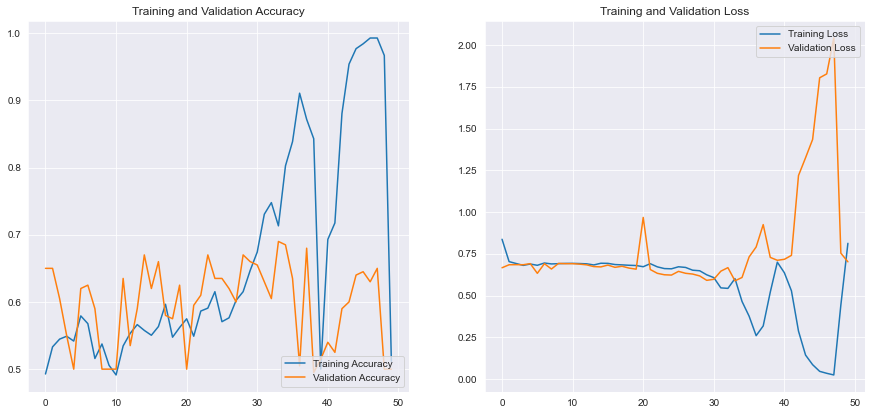

In [41]:
#I am plotting the training and validation accuracy of the model compiled above

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Model Run 2

In this run of the model, I am setting the hyperparameters as:
optimizer = adam, epochs = 100, batch_size = 32 , learning rate = 0.0001

In [28]:
#Setting the optmizer as stochastic gradient descent, with a learning rate of 0.1. 
opt_adam = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [29]:
#Compiling the Model
model.compile(optimizer = opt_adam , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [31]:
#I am fitting the model, using the predefined hyperparameters. 
history = model.fit(x_train,y_train,epochs = 100,batch_size=32,validation_data = (x_val, y_val),callbacks=[tensorboard_callback])

Epoch 1/100
22/22 [==============================] - 35s 2s/step - loss: 0.6045 - accuracy: 0.6974 - val_loss: 0.6682 - val_accuracy: 0.5300
Epoch 2/100
22/22 [==============================] - 26s 1s/step - loss: 0.4918 - accuracy: 0.7666 - val_loss: 0.6080 - val_accuracy: 0.6850
Epoch 3/100
22/22 [==============================] - 26s 1s/step - loss: 0.4040 - accuracy: 0.8242 - val_loss: 0.6375 - val_accuracy: 0.5650
Epoch 4/100
22/22 [==============================] - 27s 1s/step - loss: 0.3390 - accuracy: 0.8646 - val_loss: 0.5880 - val_accuracy: 0.6700
Epoch 5/100
22/22 [==============================] - 26s 1s/step - loss: 0.2648 - accuracy: 0.8991 - val_loss: 0.6046 - val_accuracy: 0.6900
Epoch 6/100
22/22 [==============================] - 26s 1s/step - loss: 0.1759 - accuracy: 0.9452 - val_loss: 0.6065 - val_accuracy: 0.7150
Epoch 7/100
22/22 [==============================] - 26s 1s/step - loss: 0.1364 - accuracy: 0.9582 - val_loss: 0.6131 - val_accuracy: 0.6300
Epoch 8/100
2

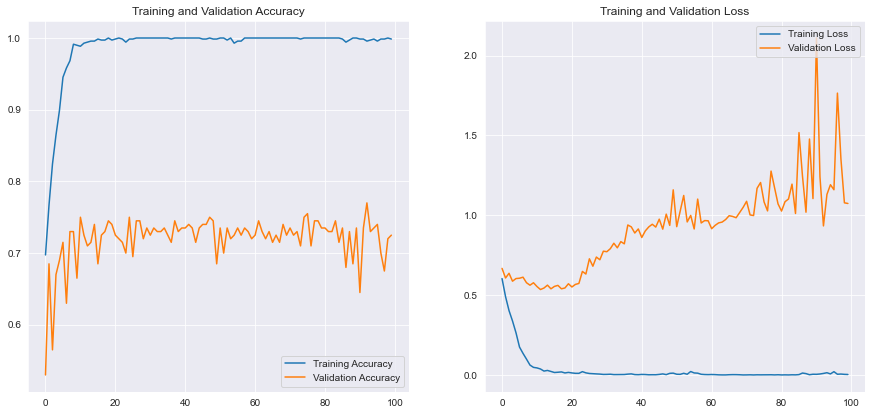

In [35]:
#I am plotting the training and validation accuracy of the model compiled above

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Note

I have plotted the training and validation accuracies and losses for the Model Run2.
Accuracy:
From the plot it is clear that training and validation accuracy keeps on increasing. The validation accuracy has flatlined around 75%, whereas the training accuracy maintains a strong score of neary 100%. 

Loss: From the plot it is clear that training and validation loss keeps on decreasing. The validation loss keeps decreasing before increasing around the 60th epoch. The training loss though keeps steadily decreasing reaching around 0 from the 20th epoch itself. 

Thus, on the training set the loss has been minimized and the accuracy has been maximized at 100%. Though in the case of the validation set, we can see that the validation loss has been increasing and the accuracy has flatlined around 75%. This feature might beindicative of overfitting of the data. Overfitting happens when the model performs exceptionally well on the training set, but not so well on the validation dataset. 

I will make some changes to the existing model and tune the hyperparameters in an attempt to reduce the overfitting of the data. 

I am naming the two models Standard_Model and Upgraded_Model.

In [65]:
#Defining the model at this step:
#In the below code, I am redefining the model and naming it model2. 

#Defining the model:
model2 = Sequential()

#Input layer of the model, taking the input images of specified shape
model2.add(Conv2D(64,3,padding="same", activation="relu", input_shape=(224,224,3)))
model2.add(MaxPool2D(pool_size=(2, 2), strides=None, padding="valid"))

#Layer 1 of the model, having weight of 64 and kernel size of 3. 
#This layer uses the "relu" activation. 
model2.add(Conv2D(64, 3, padding="same", activation="relu",kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model2.add(MaxPool2D())

#Layer 2 of the model, having weight of 32 and kernel size of 3. 
#This layer uses the "relu" activation. 
model2.add(Conv2D(32, 3, padding="same", activation="relu",kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model2.add(MaxPool2D(pool_size=(2, 2), strides=None, padding="valid"))
model2.add(Dropout(0.4))

#Layer 3, fully connected layer of the model
model2.add(Flatten())
model2.add(Dense(64, activation="relu"))

#Layer 4, fully connected layer of the model
model2.add(Flatten())
model2.add(Dense(128,activation="relu", kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model2.add(BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True))

#Output layer of the model
model2.add(Dense(2, activation="softmax"))

#Printing the summary of the model
model2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 56, 56, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 56, 56, 32)        18464     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 28, 28, 32)      

### Model Run 3

In this run of the model, I am setting the hyperparameters as: optimizer = adam, epochs = 100, batch_size = 32 , learning rate = 0.001

In [47]:
#Setting the optmizer as stochastic gradient descent, with a learning rate of 0.001
opt_adam = tf.keras.optimizers.Adam(learning_rate=0.001)

In [48]:
#Compiling the Model
model2.compile(optimizer = opt_adam , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [49]:
#I am fitting the model, using the predefined hyperparameters. 
history2 = model2.fit(x_train,y_train,epochs = 100,batch_size=32,validation_data = (x_val, y_val),callbacks=[tensorboard_callback])

Epoch 1/100
22/22 [==============================] - 49s 2s/step - loss: 2.3594 - accuracy: 0.6081 - val_loss: 2.3366 - val_accuracy: 0.5650
Epoch 2/100
22/22 [==============================] - 46s 2s/step - loss: 1.8039 - accuracy: 0.7133 - val_loss: 1.7220 - val_accuracy: 0.6150
Epoch 3/100
22/22 [==============================] - 46s 2s/step - loss: 1.4460 - accuracy: 0.7406 - val_loss: 1.5265 - val_accuracy: 0.5600
Epoch 4/100
22/22 [==============================] - 46s 2s/step - loss: 1.2300 - accuracy: 0.7594 - val_loss: 1.2271 - val_accuracy: 0.7050
Epoch 5/100
22/22 [==============================] - 45s 2s/step - loss: 0.9970 - accuracy: 0.8156 - val_loss: 1.0899 - val_accuracy: 0.7300
Epoch 6/100
22/22 [==============================] - 46s 2s/step - loss: 0.8982 - accuracy: 0.8084 - val_loss: 1.0905 - val_accuracy: 0.6100
Epoch 7/100
22/22 [==============================] - 46s 2s/step - loss: 0.7516 - accuracy: 0.8732 - val_loss: 0.9962 - val_accuracy: 0.6800
Epoch 8/100
2

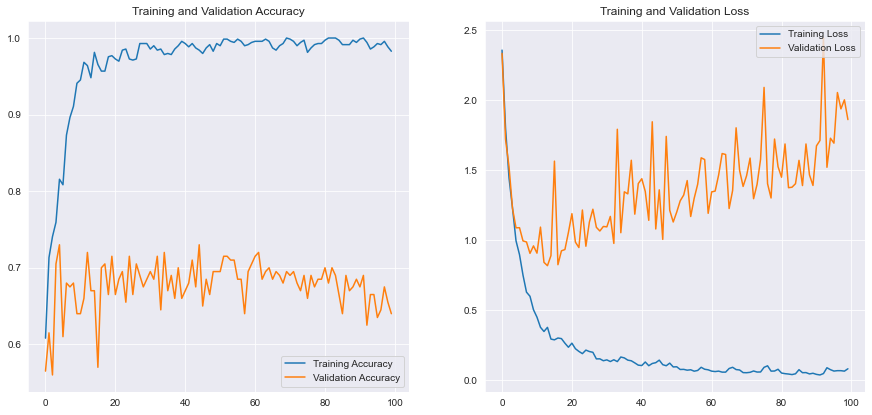

In [50]:
#I am plotting the training and validation accuracy of the model compiled above

acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc2, label='Training Accuracy')
plt.plot(epochs_range, val_acc2, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss2, label='Training Loss')
plt.plot(epochs_range, val_loss2, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Model Run 4

In this run of the model, I am setting the hyperparameters as: optimizer = adam, epochs = 250, batch_size = 32 , learning rate = 0.00001

In [59]:
#Setting the optmizer as stochastic gradient descent, with a learning rate of 0.00001. 
opt_adam_2 = tf.keras.optimizers.Adam(learning_rate=0.00001)

In [60]:
#Compiling the Model
model2.compile(optimizer = opt_adam_2 , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [61]:
#I am fitting the model, using the predefined hyperparameters. 
history3 = model2.fit(x_train,y_train,epochs = 250,batch_size=32,validation_data = (x_val, y_val),callbacks=[tensorboard_callback])

Epoch 1/250


C:\Users\mit_b\Anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


22/22 [==============================] - 45s 2s/step - loss: 0.0561 - accuracy: 0.9942 - val_loss: 1.8032 - val_accuracy: 0.6450
Epoch 2/250
22/22 [==============================] - 41s 2s/step - loss: 0.0549 - accuracy: 0.9914 - val_loss: 1.7729 - val_accuracy: 0.6550
Epoch 3/250
22/22 [==============================] - 39s 2s/step - loss: 0.0550 - accuracy: 0.9928 - val_loss: 1.7521 - val_accuracy: 0.6600
Epoch 4/250
22/22 [==============================] - 40s 2s/step - loss: 0.0530 - accuracy: 0.9942 - val_loss: 1.7364 - val_accuracy: 0.6600
Epoch 5/250
22/22 [==============================] - 39s 2s/step - loss: 0.0485 - accuracy: 0.9971 - val_loss: 1.7224 - val_accuracy: 0.6550
Epoch 6/250
22/22 [==============================] - 38s 2s/step - loss: 0.0483 - accuracy: 0.9971 - val_loss: 1.7157 - val_accuracy: 0.6600
Epoch 7/250
22/22 [==============================] - 39s 2s/step - loss: 0.0518 - accuracy: 0.9971 - val_loss: 1.7091 - val_accuracy: 0.6600
Epoch 8/250
22/22 [======

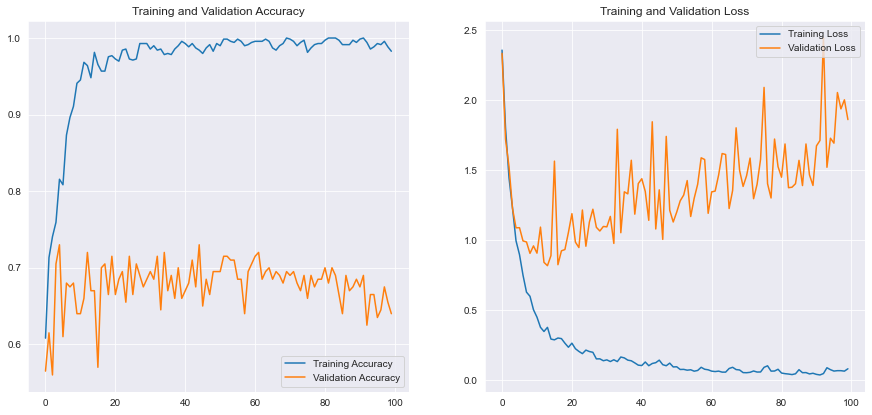

In [62]:
#I am plotting the training and validation accuracy of the model compiled above

acc3 = history3.history['accuracy']
val_acc3 = history3.history['val_accuracy']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc2, label='Training Accuracy')
plt.plot(epochs_range, val_acc2, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss2, label='Training Loss')
plt.plot(epochs_range, val_loss2, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Predictions

In the code below, I have predicted using the two models, model and model2 and have tested it on the validation dataset. I have predicted results and have tabulated it against the validation dataset. I am calculating the accuracy, recall, precision and f1 score. 

### Standard_Model

In [57]:
#Making the predictions on the customized model:
#I am prinitng out the precision and accuracy on the test data. 

predictions_model = np.argmax(model.predict(x_val), axis=-1)
print(classification_report(y_val, predictions_model, target_names = ['Alien (Class 0)','Predator (Class 1)']))

                    precision    recall  f1-score   support

   Alien (Class 0)       0.71      0.75      0.73       100
Predator (Class 1)       0.74      0.70      0.72       100

          accuracy                           0.73       200
         macro avg       0.73      0.72      0.72       200
      weighted avg       0.73      0.72      0.72       200



In [56]:
#Making the predictions on the customized model:
#I am prinitng out the precision and accuracy on the test data. 

predictions_model2 = np.argmax(model2.predict(x_val), axis=-1)
print(classification_report(y_val, predictions_model2, target_names = ['Alien (Class 0)','Predator (Class 1)']))

                    precision    recall  f1-score   support

   Alien (Class 0)       0.67      0.55      0.60       100
Predator (Class 1)       0.62      0.73      0.67       100

          accuracy                           0.64       200
         macro avg       0.64      0.64      0.64       200
      weighted avg       0.64      0.64      0.64       200



### Upgraded_Model

In [63]:
#Making the predictions on the customized model:
#I am prinitng out the precision and accuracy on the test data. 

predictions_model2 = np.argmax(model2.predict(x_val), axis=-1)
print(classification_report(y_val, predictions_model2, target_names = ['Alien (Class 0)','Predator (Class 1)']))

                    precision    recall  f1-score   support

   Alien (Class 0)       0.72      0.69      0.70       100
Predator (Class 1)       0.70      0.73      0.72       100

          accuracy                           0.71       200
         macro avg       0.71      0.71      0.71       200
      weighted avg       0.71      0.71      0.71       200



In [64]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 27404), started 7:12:19 ago. (Use '!kill 27404' to kill it.)

# Discussion

In the notebook above, I have built 2 types of models . The first model is a traditional CNN Model, whereas the second one is a CNN Model with added components like BatchNormalization and L2 regularization. I have run each of the models twice and have the trained models to predict if the image is alien/predator. I am naming the two models Standard_Model and Upgraded_Model. The performance of the Standard_Model has strong suggestions of overfitting as the performance on the training set is nearly 100%, whereas the performance on the validation set is not exceeding 70%. 

This is why I had modified the model by adding elements like BatchNormalization and L2 regularization. The L2 regularization would add a penalty term at each step of the layer. I ran this Upgraded_Model twice, in which the accuracy on the training data held steady at 100%, but the accuracy on the validation set did not exceed 72%. This suggests a strong prevelance of overfitting of data even after applying a penalty term and batchnormalization. 

The overfitting of the model might be indicative of the small dataset being used to train the model. As the dataset being used is small, this results in the model fitting itself exactly to the training data and thus when it is coming across unseen data (validation data), it is unable to classifcy it properly. One of the reasons why this is possible is that Neural Network Models require large datasets to train and models trained on small datasets always have a tendency to overfit. 

I am adding the plots obtained in Tensorboard below. 

## Graph of Accuracy vs Epochs

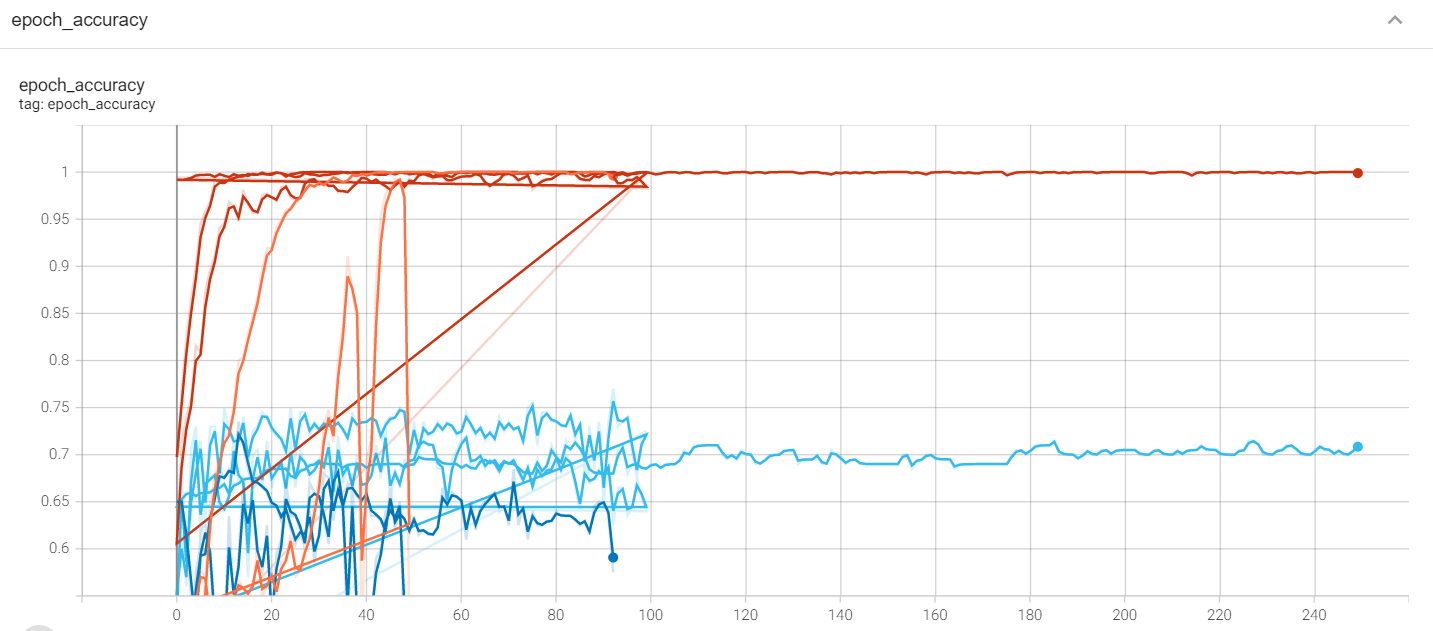

## Graph of Evaluation Accuracy vs Iterations

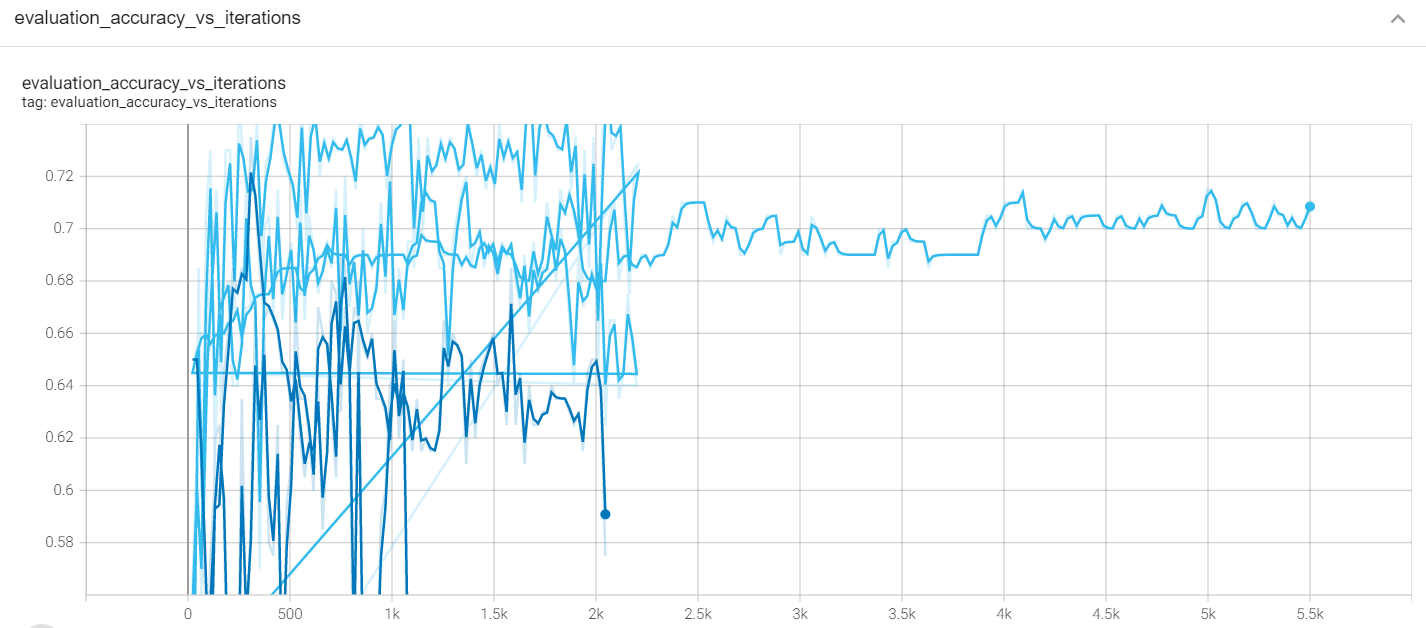

## Graph of Evaluation Loss vs Iterations

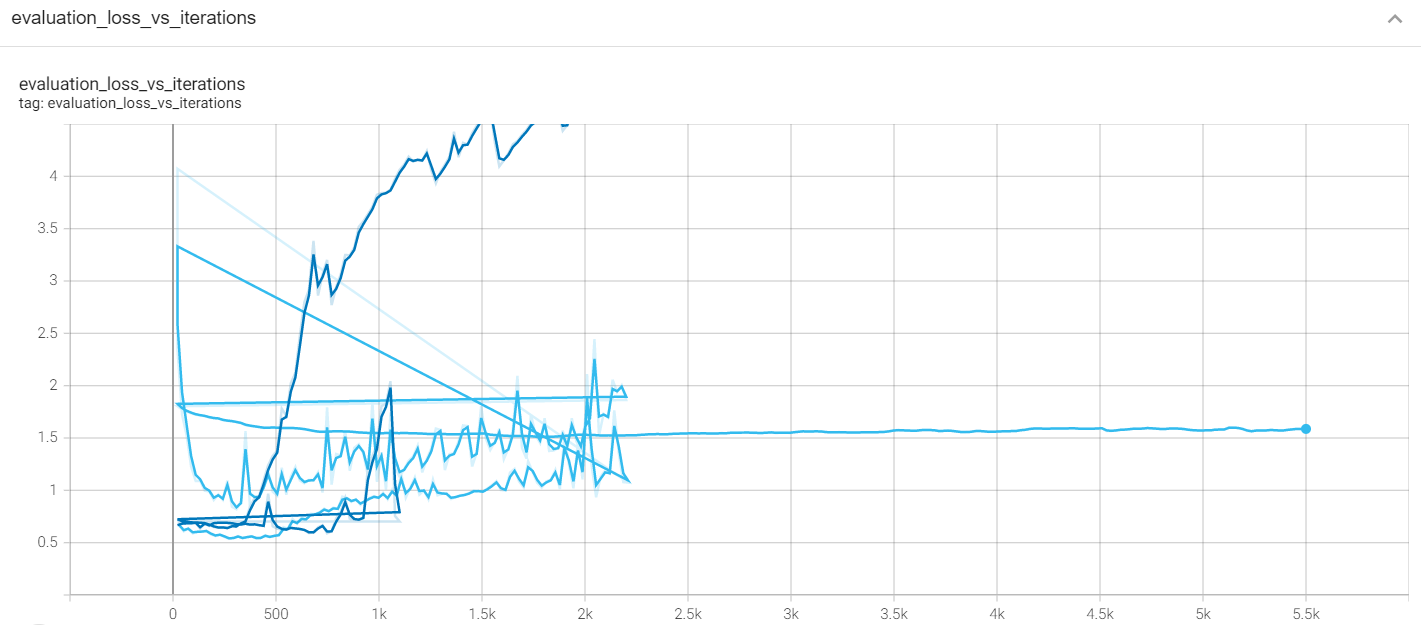